In [ ]:
import pandas as pd
import csv

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/cardio_data_processed.csv")

Dataset:- https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [ ]:
df = df.drop('id', axis = 1)

In [ ]:
df.duplicated().sum()

24

In [ ]:
df['bp_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [ ]:
values = {'Normal' : 0, "Elevated": 1, 'Hypertension Stage 1' : 2 , 'Hypertension Stage 2' : 3}

In [ ]:
for i in range(df.shape[0]):
  df.loc[i, 'bp_category'] = values[df['bp_category'][i]]
  # print(df.loc[i, 'bp_category'], '-', values[df['bp_category']])

In [ ]:
df = df.drop('bp_category_encoded', axis=1)

In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'bp_category'],
      dtype='object')

In [ ]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
age,1.000000,-0.023960,-0.082014,0.053321,0.211606,0.155999,0.155131,0.098540,-0.048078,-0.028970,-0.010297,0.239032,0.999092,0.085906,0.188475
gender,-0.023960,1.000000,0.498323,0.156027,0.060722,0.066126,-0.037397,-0.021822,0.337758,0.170719,0.005206,0.006098,-0.024098,-0.096512,0.074075
height,-0.082014,0.498323,1.000000,0.292679,0.018544,0.035550,-0.050957,-0.019317,0.187543,0.094354,-0.008241,-0.011276,-0.081974,-0.288037,0.053381
weight,0.053321,0.156027,0.292679,1.000000,0.268289,0.250184,0.139816,0.105734,0.067169,0.067177,-0.017443,0.177829,0.053199,0.763079,0.233491
ap_hi,0.211606,0.060722,0.018544,0.268289,1.000000,0.731812,0.195330,0.093151,0.026032,0.032536,-0.001409,0.433802,0.211314,0.230163,0.729341
ap_lo,0.155999,0.066126,0.035550,0.250184,0.731812,1.000000,0.161637,0.073319,0.023836,0.036212,-0.001234,0.342900,0.155777,0.206944,0.826389
cholesterol,0.155131,-0.037397,-0.050957,0.139816,0.195330,0.161637,1.000000,0.450452,0.009570,0.034184,0.008658,0.220778,0.154738,0.145234,0.142204
gluc,0.098540,-0.021822,-0.019317,0.105734,0.093151,0.073319,0.450452,1.000000,-0.006109,0.009379,-0.008003,0.088905,0.098212,0.101253,0.071702
smoke,-0.048078,0.337758,0.187543,0.067169,0.026032,0.023836,0.009570,-0.006109,1.000000,0.338226,0.024999,-0.016567,-0.048089,-0.027544,0.018497
alco,-0.028970,0.170719,0.094354,0.067177,0.032536,0.036212,0.034184,0.009379,0.338226,1.000000,0.024339,-0.009038,-0.029052,0.014559,0.023674


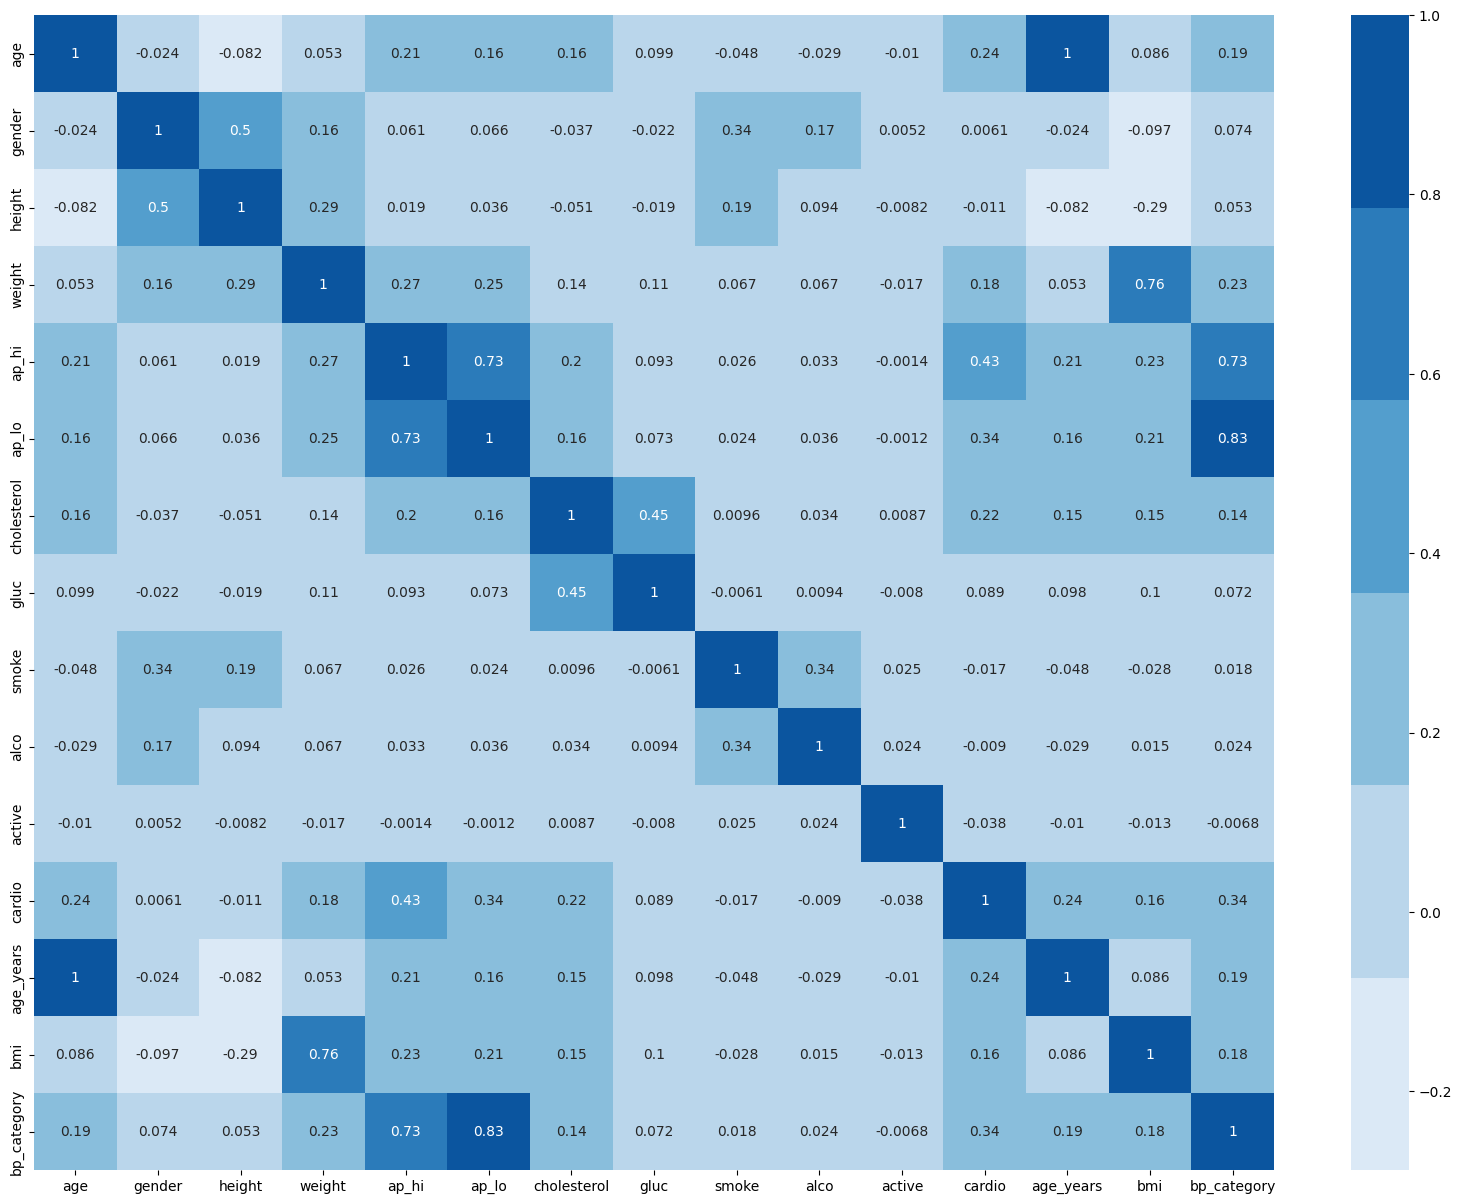

In [ ]:
plt.subplots(figsize=(20,15))
matrix = sns.heatmap(df.corr(), cmap=sns.color_palette("Blues"), annot=True)

In [ ]:
df = df.drop('age', axis = 1)

In [ ]:
df.rename(columns={'age_years':'age'}, inplace=True)

In [ ]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,3
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,2
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,2
68201,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,3
68202,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,3
68203,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,2


<Axes: >

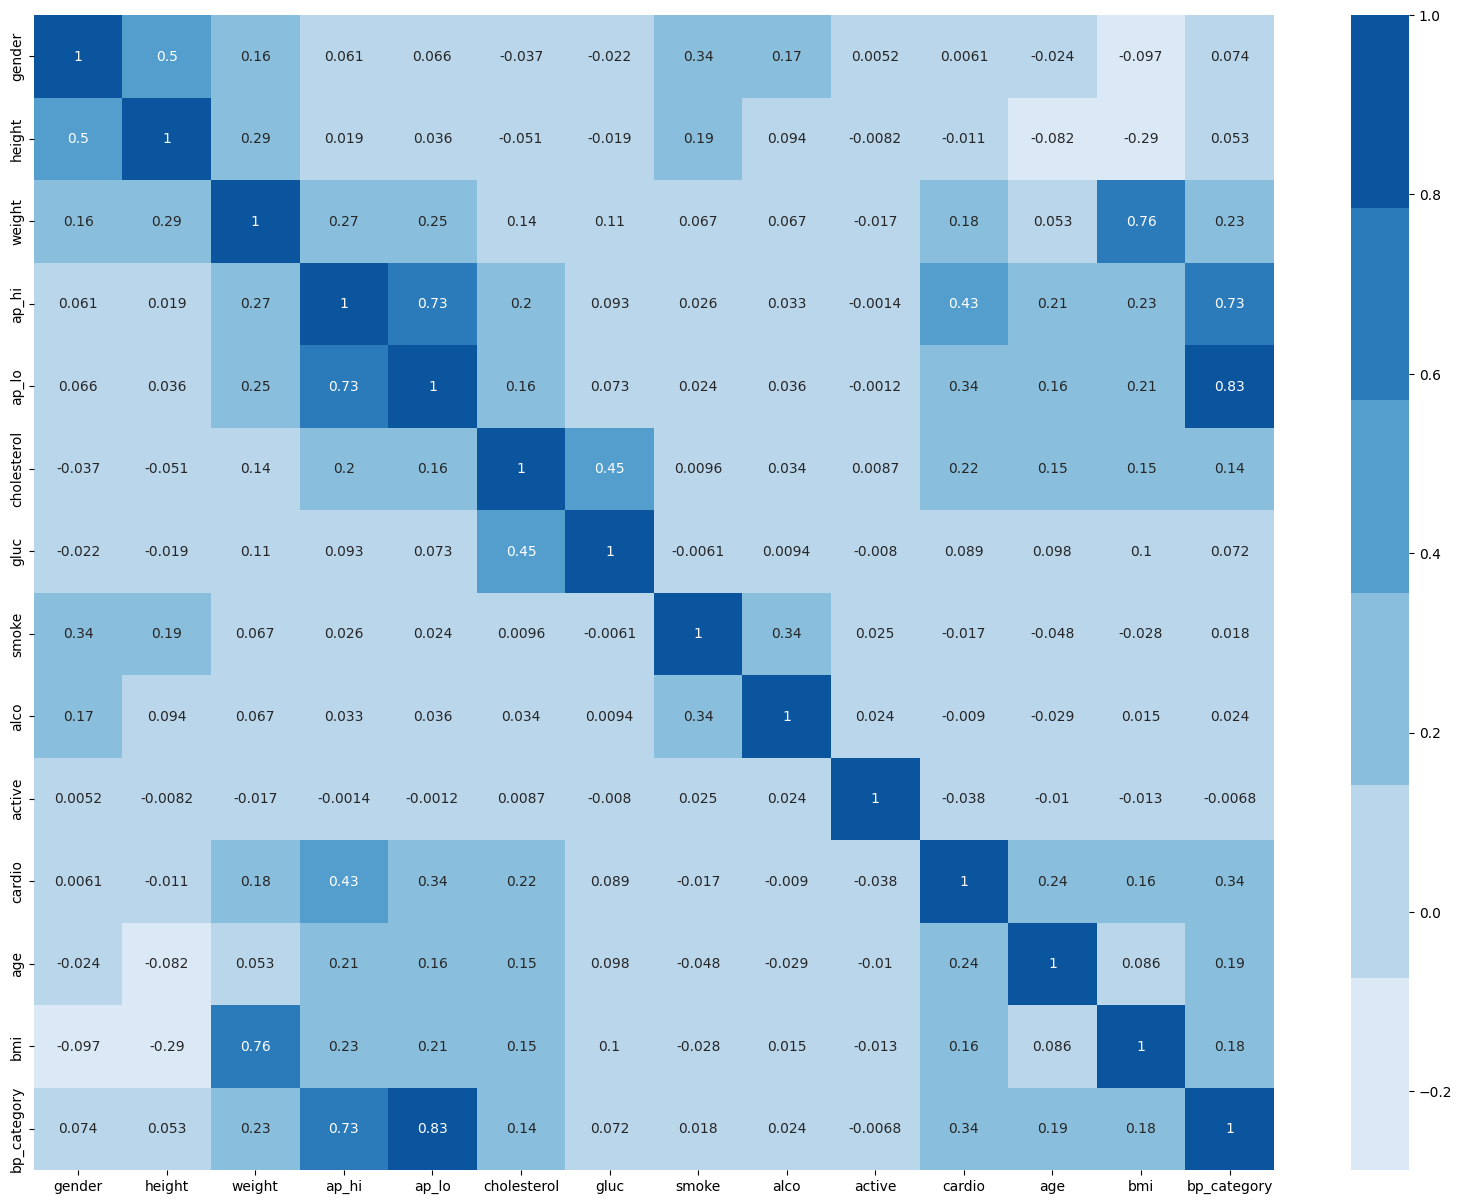

In [ ]:
plt.subplots(figsize=(20,15))
new_matrix = sns.heatmap(df.corr(), cmap=sns.color_palette("Blues"), annot=True)
new_matrix

<Axes: >

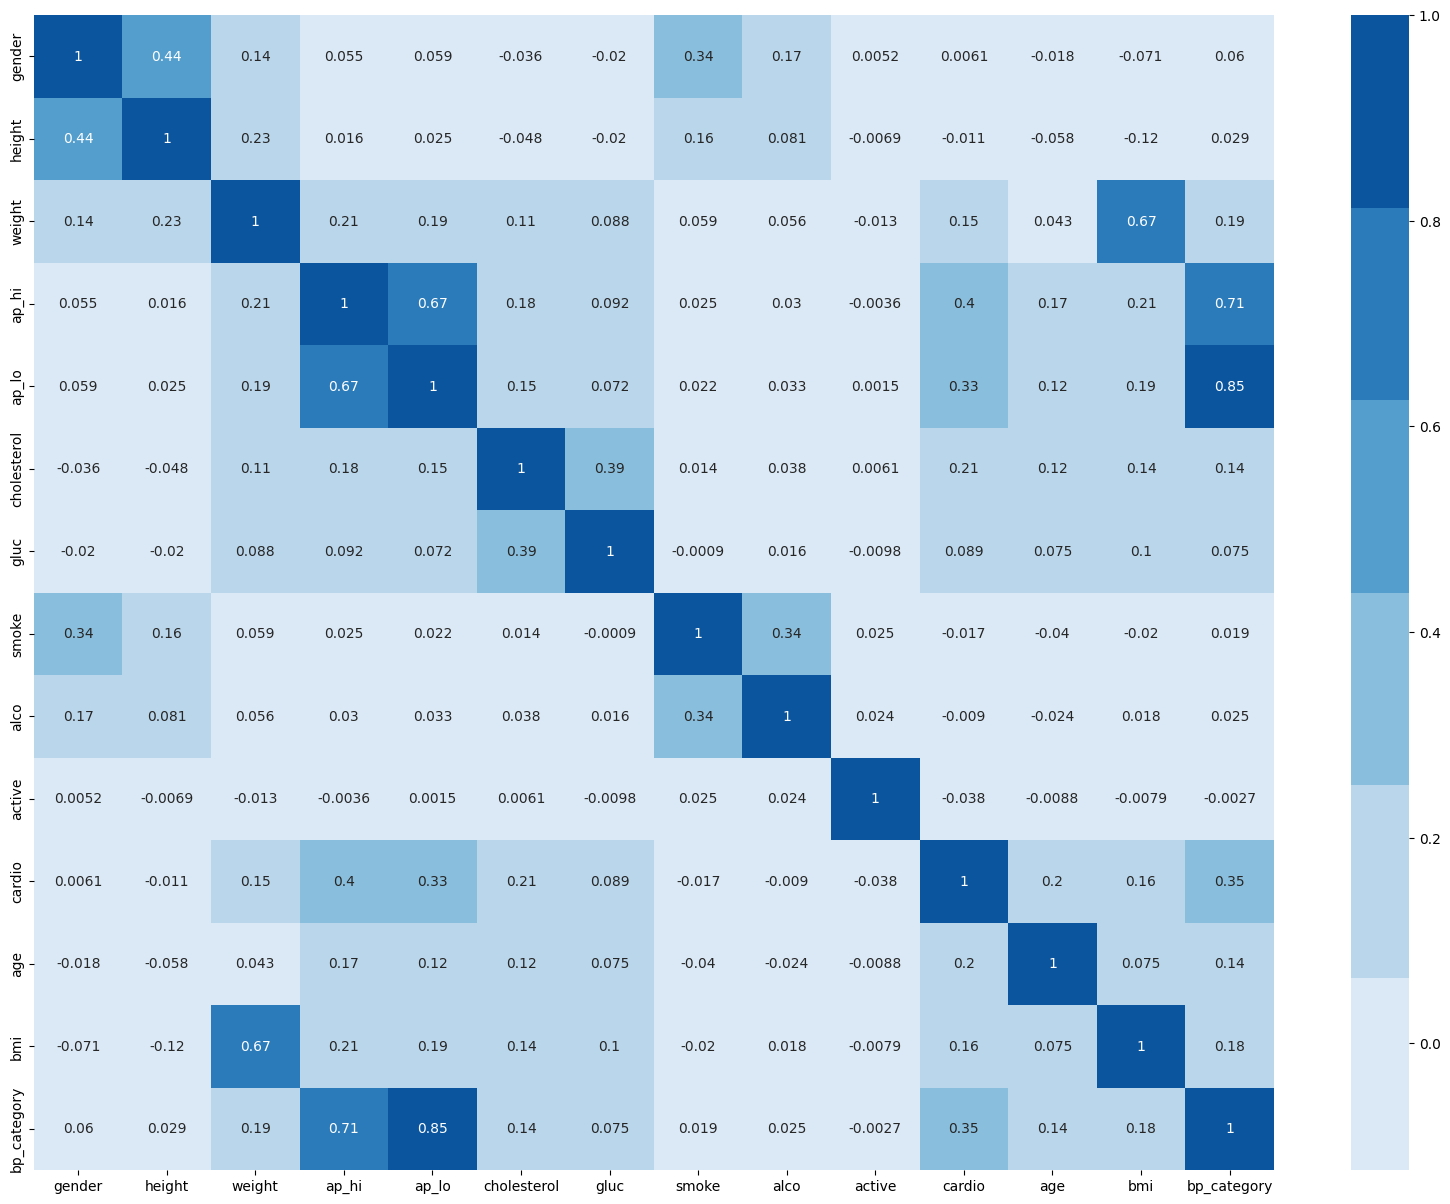

In [ ]:
plt.subplots(figsize=(20,15))
new_matrix1 = sns.heatmap(df.corr(method='kendall'), cmap=sns.color_palette("Blues"), annot=True)
new_matrix1

In [ ]:
new_df = df.drop(['gender', 'height', 'smoke', 'alco', 'active'], axis = 1)
new_df.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age,bmi,bp_category
0,62.0,110,80,1,1,0,50,21.967120,2
1,85.0,140,90,3,1,1,55,34.927679,3
2,64.0,130,70,3,1,1,51,23.507805,2
3,82.0,150,100,1,1,1,48,28.710479,3
4,56.0,100,60,1,1,0,47,23.011177,0


In [ ]:
for i in range(new_df.shape[0]):
  new_df.loc[i, 'bmi'] = int(new_df['bmi'][i])
new_df.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age,bmi,bp_category
0,62.0,110,80,1,1,0,50,21.0,2
1,85.0,140,90,3,1,1,55,34.0,3
2,64.0,130,70,3,1,1,51,23.0,2
3,82.0,150,100,1,1,1,48,28.0,3
4,56.0,100,60,1,1,0,47,23.0,0


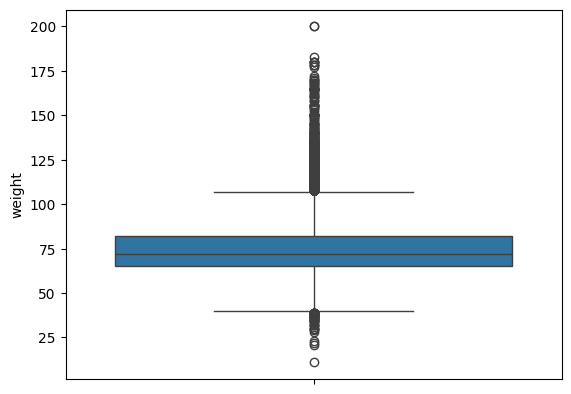

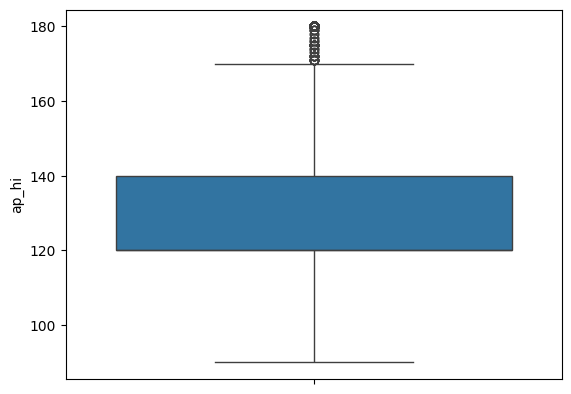

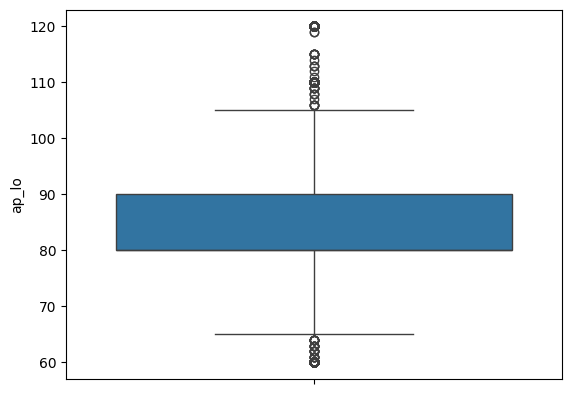

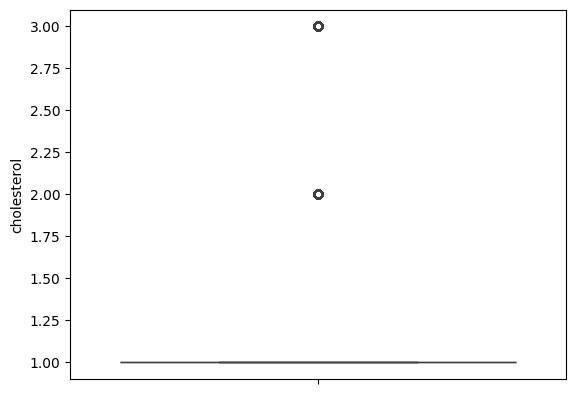

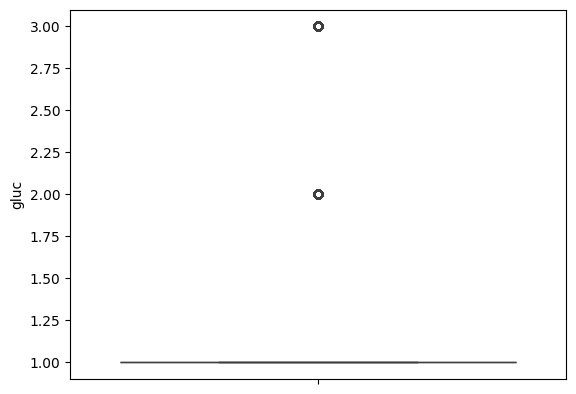

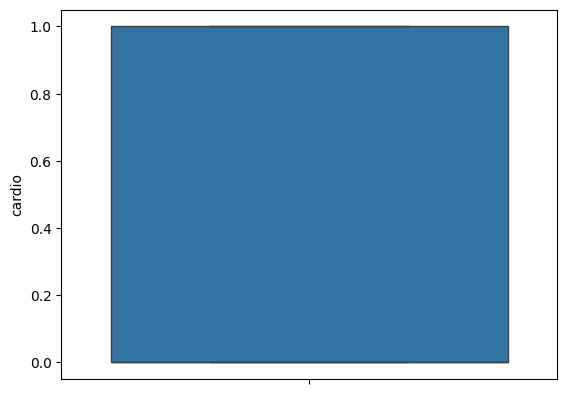

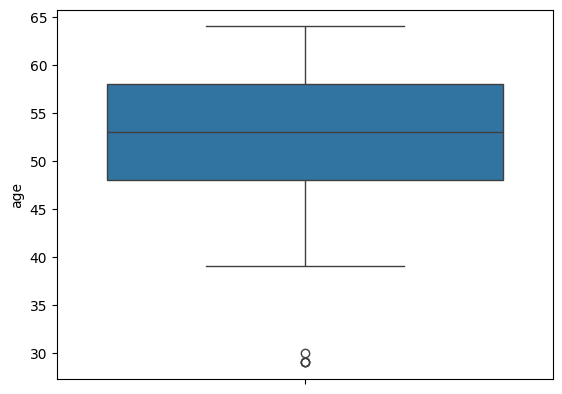

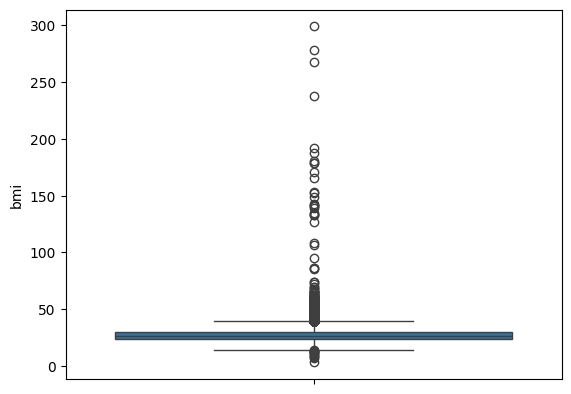

In [ ]:
cols = new_df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [ ]:
trial = df.drop(['gender', 'height', 'smoke', 'alco', 'active', 'gluc', 'bp_category'], axis = 1)

In [ ]:
q1 = trial['weight'].quantile(0.25)
q3 = trial['weight'].quantile(0.75)
iqr = q3 - q1
trial = trial[(trial['weight'] >= q1-1.5*iqr) & (trial['weight'] <= q3+1.5*iqr)]

In [ ]:
trial.shape

(66494, 7)

In [ ]:
df.shape

(68205, 14)

In [ ]:
q1 = trial['bmi'].quantile(0.25)
q3 = trial['bmi'].quantile(0.75)
iqr = q3 - q1
trial = trial[(trial['bmi'] >= q1-1.5*iqr) & (trial['bmi'] <= q3+1.5*iqr)]

In [ ]:
trial.shape

(65157, 7)

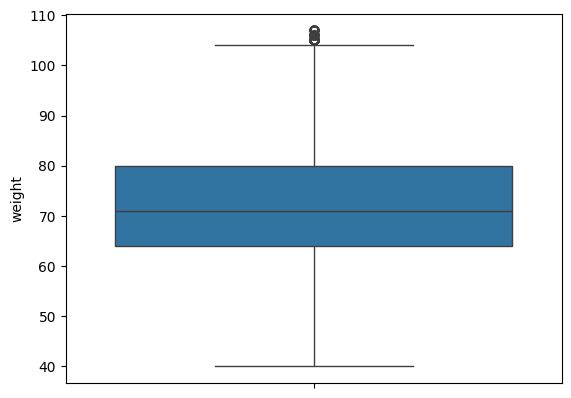

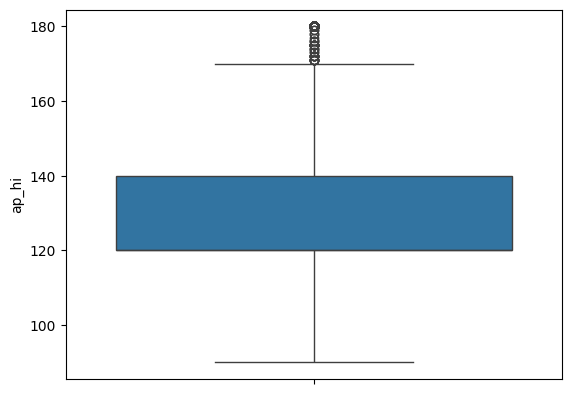

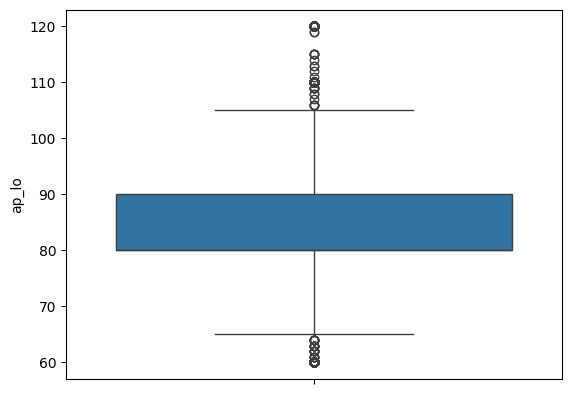

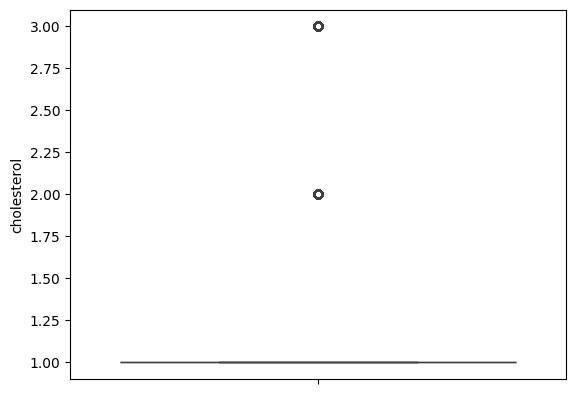

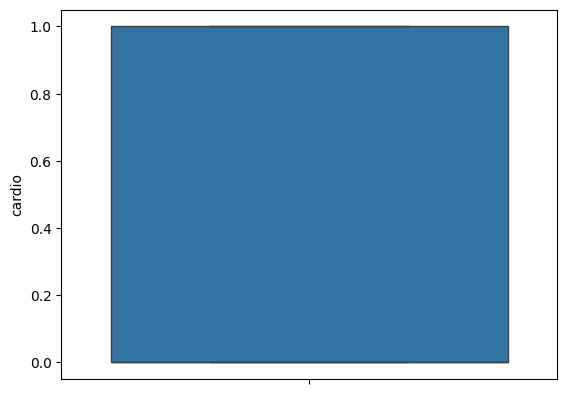

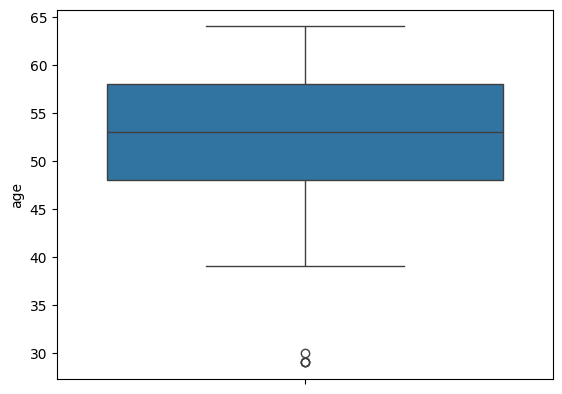

In [ ]:
cols = trial.columns[0:-1]
for i in cols:
    sns.boxplot(y=trial[i])
    plt.show()

In [ ]:
q1 = trial['ap_lo'].quantile(0.25)
q3 = trial['ap_lo'].quantile(0.75)
iqr = q3 - q1
trial = trial[(trial['ap_lo'] >= q1-1.5*iqr) & (trial['ap_lo'] <= q3+1.5*iqr)]

In [ ]:
q1 = trial['ap_hi'].quantile(0.25)
q3 = trial['ap_hi'].quantile(0.75)
iqr = q3 - q1
trial = trial[(trial['ap_hi'] >= q1-1.5*iqr) & (trial['ap_hi'] <= q3+1.5*iqr)]

In [ ]:
trial.shape

(61656, 7)

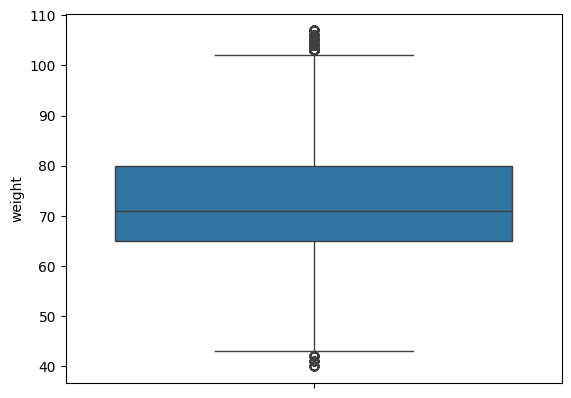

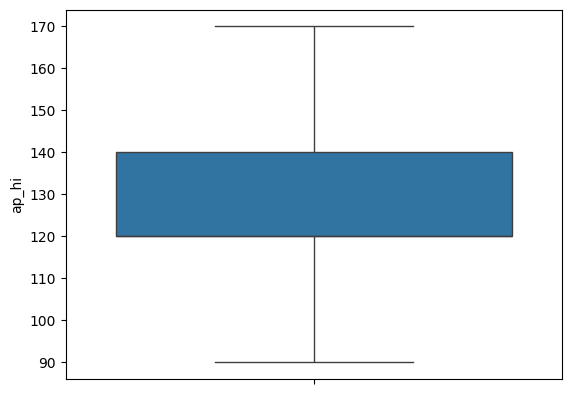

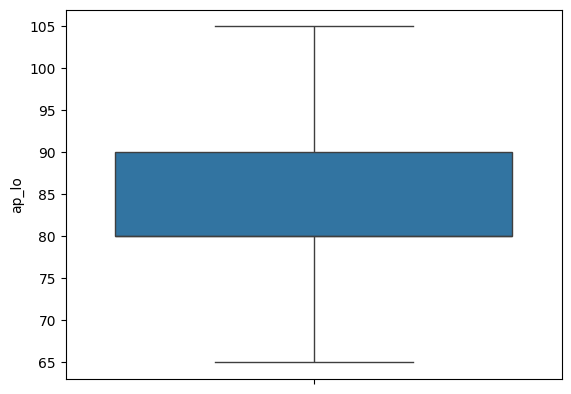

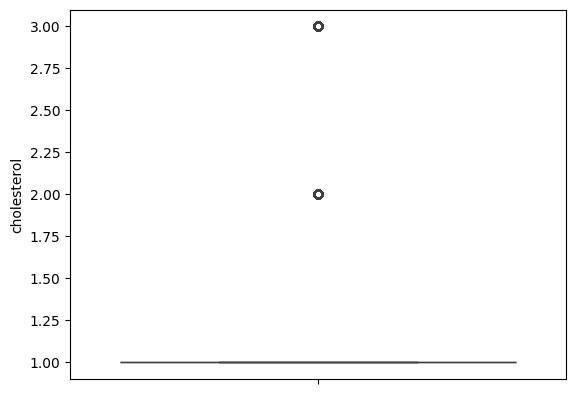

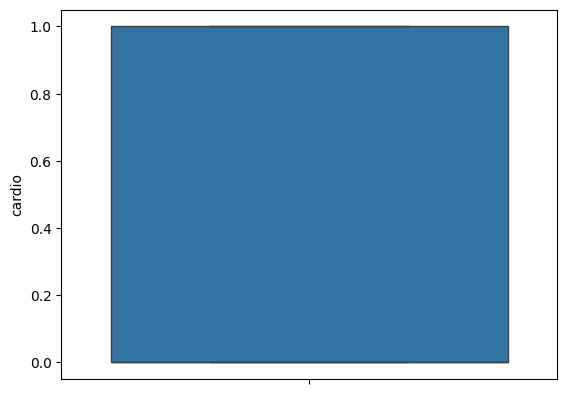

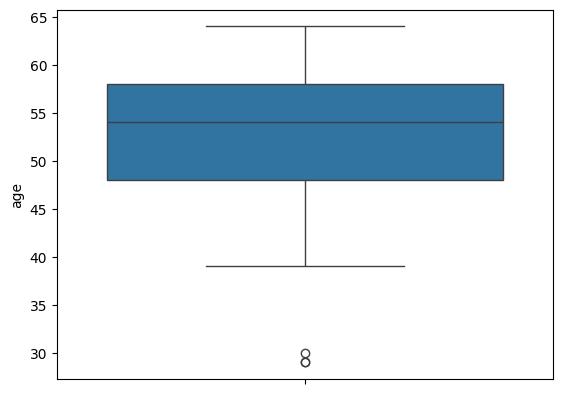

In [ ]:
cols = trial.columns[0:-1]
for i in cols:
    sns.boxplot(y=trial[i])
    plt.show()

In [ ]:
trial.columns

Index(['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'cardio', 'age', 'bmi'], dtype='object')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# X = new_df.drop('cardio', axis = 1)
# y = new_df['cardio']

In [ ]:
X = trial.drop('cardio', axis = 1)
y = trial['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5],
          "criterion" :["entropy", 'gini', 'log_loss']}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3, min_samples_leaf = 5, min_samples_split = 2, random_state=1)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7193480376256892


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6330
           1       0.74      0.65      0.69      6002

    accuracy                           0.72     12332
   macro avg       0.72      0.72      0.72     12332
weighted avg       0.72      0.72      0.72     12332



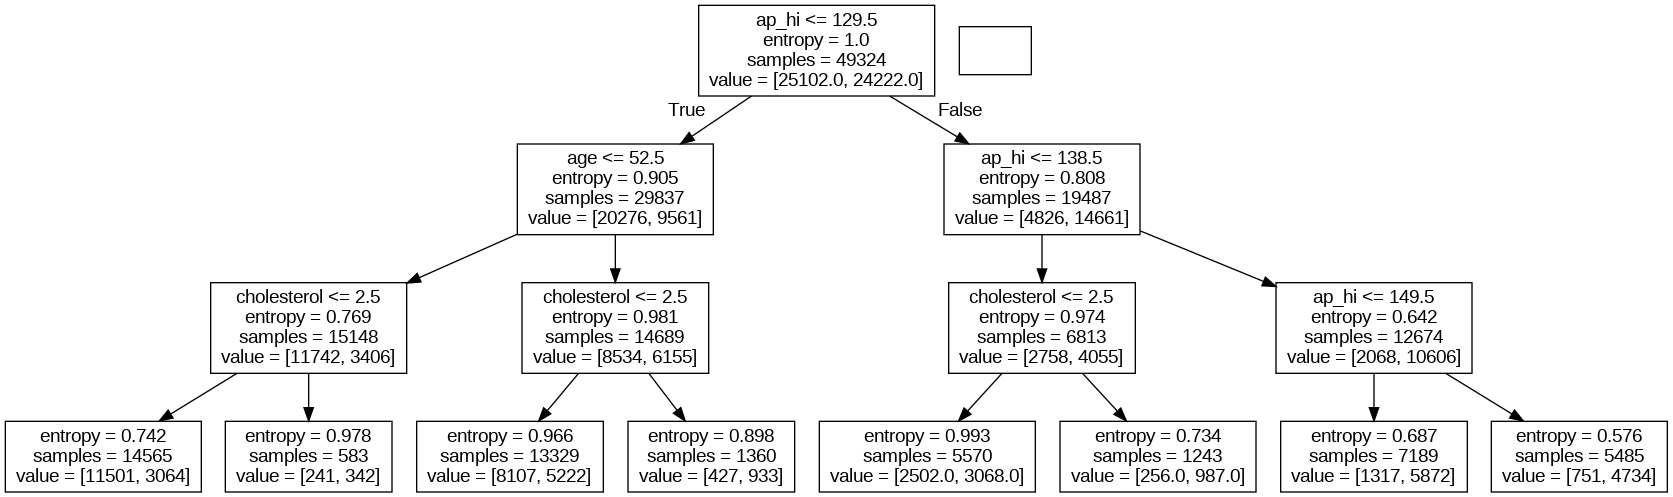

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(clf, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())